# EDA and Feature Preprocess

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

import plotly.express as px
from plotly.subplots import make_subplots


from scipy.stats import pearsonr

from sklearn.ensemble import RandomForestRegressor

import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)


/Users/xd/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/xd/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Add column names

# train and test column names
column_names_first_5 = ['Unit_Number', 'Time_in_Cycles', 'Operational_Setting_1', 'Operational_Setting_2', 'Operational_Setting_3']

remaining_column_names = [f'Sensor_Measurement_{i}' for i in range(1,22)]

column_names = column_names_first_5 + remaining_column_names

# train_FD001, train_FD002, train_FD003, train_FD004

DF_train_FD001 = pd.read_csv("train_FD001.txt", delim_whitespace=True, names=column_names)
DF_train_FD002 = pd.read_csv("train_FD002.txt", delim_whitespace=True, names=column_names)
DF_train_FD003 = pd.read_csv("train_FD003.txt", delim_whitespace=True, names=column_names)
DF_train_FD004 = pd.read_csv("train_FD004.txt", delim_whitespace=True, names=column_names)

In [3]:
DF_train_FD001.head()

Unit_Number  Time_in_Cycles  Operational_Setting_1  Operational_Setting_2  \
0            1               1                -0.0007                -0.0004   
1            1               2                 0.0019                -0.0003   
2            1               3                -0.0043                 0.0003   
3            1               4                 0.0007                 0.0000   
4            1               5                -0.0019                -0.0002   

   Operational_Setting_3  Sensor_Measurement_1  Sensor_Measurement_2  \
0                  100.0                518.67                641.82   
1                  100.0                518.67                642.15   
2                  100.0                518.67                642.35   
3                  100.0                518.67                642.35   
4                  100.0                518.67                642.37   

   Sensor_Measurement_3  Sensor_Measurement_4  Sensor_Measurement_5  ...  \
0               1589.70               1400.60                 14.62  ...   
1               1591.82               1403.14                 14.62  ...   
2               1587.99               1404.20                 14.62  ...   
3               1582.79               1401.87                 14.62  ...   
4               1582.85               1406.22                 14.62  ...   

   Sensor_Measurement_12  Sensor_Measurement_13  Sensor_Measurement_14  \
0                 521.66                2388.02                8138.62   
1                 522.28                2388.07                8131.49   
2                 522.42                2388.03                8133.23   
3                 522.86                2388.08                8133.83   
4                 522.19                2388.04                8133.80   

   Sensor_Measurement_15  Sensor_Measurement_16  Sensor_Measurement_17  \
0                 8.4195                   0.03                    392   
1                 8.4318                   0.03                    392   
2                 8.4178                   0.03                    390   
3                 8.3682                   0.03                    392   
4                 8.4294                   0.03                    393   

   Sensor_Measurement_18  Sensor_Measurement_19  Sensor_Measurement_20  \
0                   2388                  100.0                  39.06   
1                   2388                  100.0                  39.00   
2                   2388                  100.0                  38.95   
3                   2388                  100.0                  38.88   
4                   2388                  100.0                  38.90   

   Sensor_Measurement_21  
0                23.4190  
1                23.4236  
2                23.3442  
3                23.3739  
4                23.4044  

[5 rows x 26 columns]

In [4]:
# check if there is any NaN values

# Train data set
missing_Train_FD001= DF_train_FD001.isna().sum()
missing_Train_FD002= DF_train_FD002.isna().sum()
missing_Train_FD003= DF_train_FD003.isna().sum()
missing_Train_FD004= DF_train_FD004.isna().sum()

missing_columns_Train_FD001 = missing_Train_FD001[missing_Train_FD001 > 0]
missing_columns_Train_FD002 = missing_Train_FD002[missing_Train_FD002 > 0]
missing_columns_Train_FD003 = missing_Train_FD003[missing_Train_FD003 > 0]
missing_columns_Train_FD004 = missing_Train_FD004[missing_Train_FD004 > 0]


print(missing_columns_Train_FD001)
print(missing_columns_Train_FD002)
print(missing_columns_Train_FD003)
print(missing_columns_Train_FD004)

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


No NaN values in Train datasets

Since the RUL given in the data are from the test datasets, therefore we have to calculate the RUL in the training data by calculating "Max Life of each unit - current time in cycles of corresponding unit".

In [5]:
# caculate each row's RUL in training dataset

# the max life of each engine unit in train_FD001, train_FD002, train_FD003, train_FD004
Max_Life_train_FD001 = DF_train_FD001.groupby('Unit_Number')['Time_in_Cycles'].max() 
Max_Life_train_FD002 = DF_train_FD002.groupby('Unit_Number')['Time_in_Cycles'].max() 
Max_Life_train_FD003 = DF_train_FD003.groupby('Unit_Number')['Time_in_Cycles'].max() 
Max_Life_train_FD004 = DF_train_FD004.groupby('Unit_Number')['Time_in_Cycles'].max() 


 # create column of max life cycles before failure
DF_train_FD001['Max_Life'] = DF_train_FD001['Unit_Number'].map(Max_Life_train_FD001)
DF_train_FD002['Max_Life'] = DF_train_FD002['Unit_Number'].map(Max_Life_train_FD002)
DF_train_FD003['Max_Life'] = DF_train_FD003['Unit_Number'].map(Max_Life_train_FD003)
DF_train_FD004['Max_Life'] = DF_train_FD004['Unit_Number'].map(Max_Life_train_FD004)


# caculate each row's RUL and append to a new column
DF_train_FD001['RUL'] = DF_train_FD001['Max_Life'] - DF_train_FD001['Time_in_Cycles']
DF_train_FD002['RUL'] = DF_train_FD002['Max_Life'] - DF_train_FD002['Time_in_Cycles']
DF_train_FD003['RUL'] = DF_train_FD003['Max_Life'] - DF_train_FD003['Time_in_Cycles']
DF_train_FD004['RUL'] = DF_train_FD004['Max_Life'] - DF_train_FD004['Time_in_Cycles']

In [6]:
DF_train_FD001

Unit_Number  Time_in_Cycles  Operational_Setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       Operational_Setting_2  Operational_Setting_3  Sensor_Measurement_1  \
0                    -0.0004                  100.0                518.67   
1                    -0.0003                  100.0                518.67   
2                     0.0003                  100.0                518.67   
3                     0.0000                  100.0                518.67   
4                    -0.0002                  100.0                518.67   
...                      ...                    ...                   ...   
20626                -0.0003                  100.0                518.67   
20627                -0.0005                  100.0                518.67   
20628                 0.0000                  100.0                518.67   
20629                 0.0003                  100.0                518.67   
20630                -0.0005                  100.0                518.67   

       Sensor_Measurement_2  Sensor_Measurement_3  Sensor_Measurement_4  \
0                    641.82               1589.70               1400.60   
1                    642.15               1591.82               1403.14   
2                    642.35               1587.99               1404.20   
3                    642.35               1582.79               1401.87   
4                    642.37               1582.85               1406.22   
...                     ...                   ...                   ...   
20626                643.49               1597.98               1428.63   
20627                643.54               1604.50               1433.58   
20628                643.42               1602.46               1428.18   
20629                643.23               1605.26               1426.53   
20630                643.85               1600.38               1432.14   

       Sensor_Measurement_5  ...  Sensor_Measurement_14  \
0                     14.62  ...                8138.62   
1                     14.62  ...                8131.49   
2                     14.62  ...                8133.23   
3                     14.62  ...                8133.83   
4                     14.62  ...                8133.80   
...                     ...  ...                    ...   
20626                 14.62  ...                8137.60   
20627                 14.62  ...                8136.50   
20628                 14.62  ...                8141.05   
20629                 14.62  ...                8139.29   
20630                 14.62  ...                8137.33   

       Sensor_Measurement_15  Sensor_Measurement_16  Sensor_Measurement_17  \
0                     8.4195                   0.03                    392   
1                     8.4318                   0.03                    392   
2                     8.4178                   0.03                    390   
3                     8.3682                   0.03                    392   
4                     8.4294                   0.03                    393   
...                      ...                    ...                    ...   
20626                 8.4956                   0.03                    397   
20627                 8.5139                   0.03                    395   
20628                 8.5646         

Let's create a boxplot to compare across all 4 data for further analyze.

In [7]:
# create a new column to show which data set it belongs to
Max_Life_train_FD001= Max_Life_train_FD001.reset_index()
Max_Life_train_FD002 = Max_Life_train_FD002.reset_index()
Max_Life_train_FD003 = Max_Life_train_FD003.reset_index()
Max_Life_train_FD004 = Max_Life_train_FD004.reset_index()



Max_Life_train_FD001['Dataset'] = 1
Max_Life_train_FD002['Dataset'] = 2
Max_Life_train_FD003['Dataset'] = 3
Max_Life_train_FD004['Dataset'] = 4


# concatenate those dataframes into 1
Max_Lifes = pd.concat([Max_Life_train_FD001, Max_Life_train_FD002, Max_Life_train_FD003, Max_Life_train_FD004])


Max_Lifes

Unit_Number  Time_in_Cycles  Dataset
0              1             192        1
1              2             287        1
2              3             179        1
3              4             189        1
4              5             269        1
..           ...             ...      ...
244          245             205        4
245          246             161        4
246          247             211        4
247          248             184        4
248          249             255        4

[709 rows x 3 columns]

<AxesSubplot:title={'center':'Time_in_Cycles'}, xlabel='[Dataset]'>

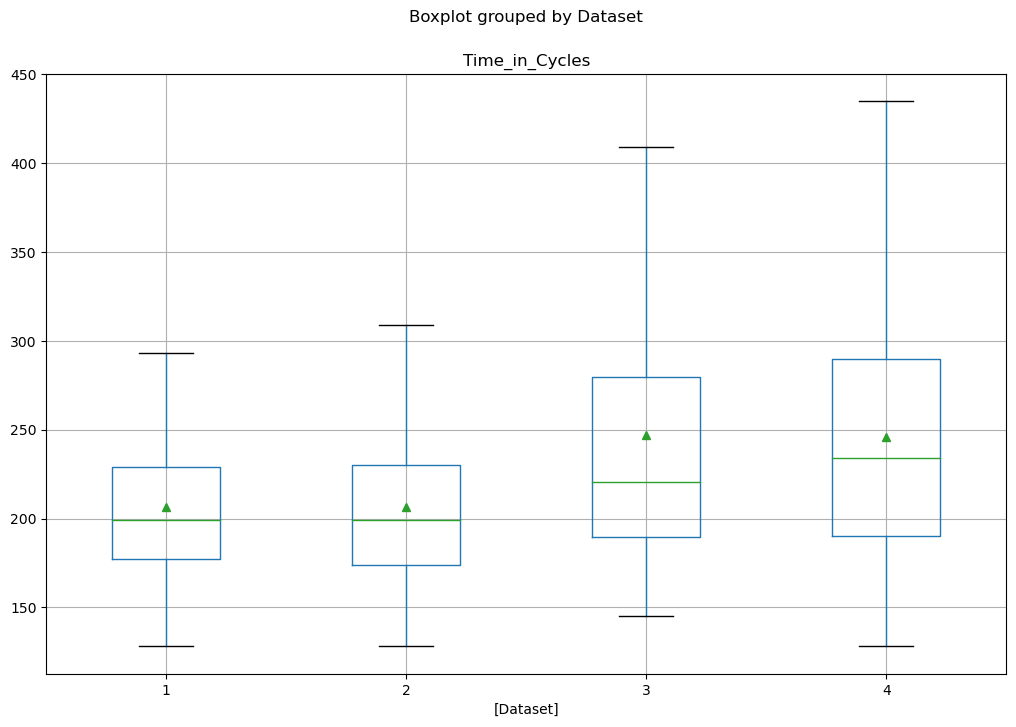

In [8]:
# create boxplot


Max_Lifes[['Dataset', 'Time_in_Cycles']].boxplot(by='Dataset',
                                           showfliers=False,
                                           showmeans=True,
                                           figsize=(12, 8))

As the boxplot shows, the mean value of those 4 train data shows data 3 under condition 1 and fault mode 2 performs bettern than the others.

Let's further analyze the correlation between RUL and each parameters.

In [9]:
# Correlation of train_FD001

correlation_results = {}

# Iterate over all columns except RUL
for col in DF_train_FD001.columns:
    if col not in ['RUL','Max_Life']:

        corr, p_val = pearsonr(DF_train_FD001[col], DF_train_FD001['RUL'])

        correlation_results[col] = {'correlation': corr, 'p_value': p_val}

# Convert the results to a DataFrame
correlation_train_FD001 = pd.DataFrame.from_dict(correlation_results, orient='index')
correlation_train_FD001 = correlation_train_FD001.sort_values(by='correlation', ascending=False)

correlation_train_FD001

/Users/xd/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


correlation       p_value
Sensor_Measurement_12     0.671983  0.000000e+00
Sensor_Measurement_7      0.657223  0.000000e+00
Sensor_Measurement_21     0.635662  0.000000e+00
Sensor_Measurement_20     0.629428  0.000000e+00
Unit_Number               0.078753  9.478455e-30
Operational_Setting_2    -0.001948  7.796840e-01
Operational_Setting_1    -0.003198  6.459587e-01
Sensor_Measurement_6     -0.128348  1.689411e-76
Sensor_Measurement_14    -0.306769  0.000000e+00
Sensor_Measurement_9     -0.390102  0.000000e+00
Sensor_Measurement_13    -0.562569  0.000000e+00
Sensor_Measurement_8     -0.563968  0.000000e+00
Sensor_Measurement_3     -0.584520  0.000000e+00
Sensor_Measurement_17    -0.606154  0.000000e+00
Sensor_Measurement_2     -0.606484  0.000000e+00
Sensor_Measurement_15    -0.642667  0.000000e+00
Sensor_Measurement_4     -0.678948  0.000000e+00
Sensor_Measurement_11    -0.696228  0.000000e+00
Time_in_Cycles           -0.736241  0.000000e+00
Operational_Setting_3          NaN           NaN
Sensor_Measurement_1           NaN           NaN
Sensor_Measurement_5           NaN           NaN
Sensor_Measurement_10          NaN           NaN
Sensor_Measurement_16          NaN           NaN
Sensor_Measurement_18          NaN           NaN
Sensor_Measurement_19          NaN           NaN

From the output above, we see there are some NaN values, since we already checked that train_FD001 does not contain any missing data, therefore it might be constant value.

In [10]:
# check if there is constant value in train_FD001

constant_columns = [col for col in DF_train_FD001.columns if DF_train_FD001[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")

Constant columns: ['Operational_Setting_3', 'Sensor_Measurement_1', 'Sensor_Measurement_5', 'Sensor_Measurement_10', 'Sensor_Measurement_16', 'Sensor_Measurement_18', 'Sensor_Measurement_19']


This indicates those columns are constant therefore we don't need to worry. From the correlation output, we know the top 5 most correlated columns are Time_in_Cycles, Sensor_Measurement_11, Sensor_Measurement_4, Sensor_Measurement_12, Sensor_Measurement_7. Where Time_in_Cycles, Sensor_Measurement_11 and Sensor_Measurement_4 are negative correlation, Sensor_Measurement_12 and Sensor_Measurement_7 are positive correlations. Operational_Setting 1 and Operational_Setting 2 shows very weak correlation with RUL since their correlation value is closer to 0 and p-values over 0.05.

Now we'll use the weight adjustment in random forest algorithm to look if there's more subtle relation between the features and our target.

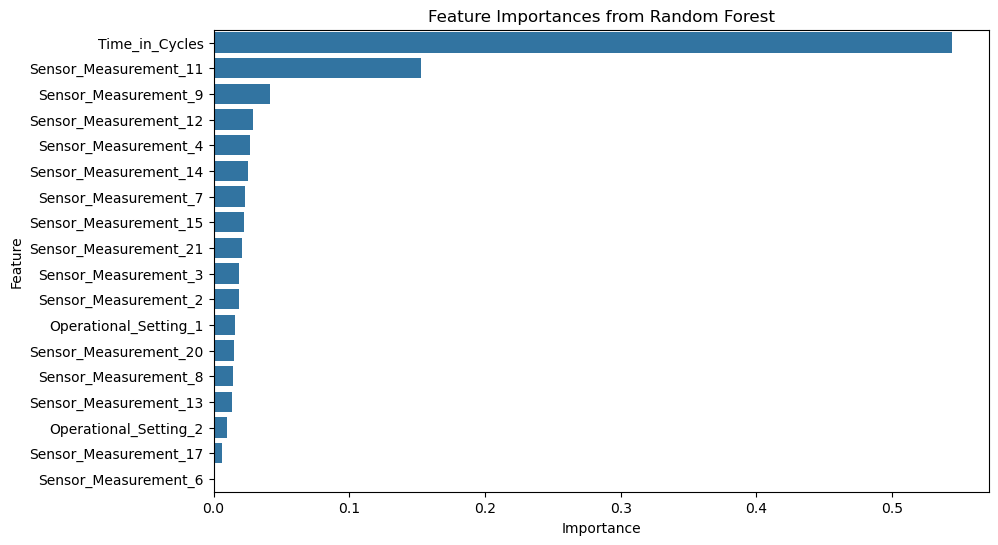

In [11]:
feature_names = [col for col in DF_train_FD001.columns if (col not in constant_columns) and (col not in ['RUL','Max_Life','Unit_Number'])   ]

features = DF_train_FD001[feature_names]
target = DF_train_FD001[['RUL']]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features, target.values.ravel())

# Get feature importances
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()


Here we'll look closer to the valuable variables that're not constant. For each column, we'll look at their general average trend (resampled) across different units, such that we'll have a general idea about their basic shape, and scale the feature accordingly to have data with more stationarity.

In [11]:
#feature resampled visualization 
data = DF_train_FD001

#resample each unit to get normalized time
data['normalized_time'] = data.groupby('Unit_Number')['Time_in_Cycles'].transform(lambda x: x / x.max())

# Define normalized time points for interpolation
normalized_time_points = np.linspace(0, 1, 100)  # 100 points from 0 to 1

# Interpolate each feature
grouped = data.groupby("Unit_Number")
interpolated_features = []
resampled_feature_names = [col for col in data.columns if (col not in constant_columns) and (col not in ['RUL','Max_Life','Unit_Number','normalized_time'])   ]


for unit, unit_data in grouped:
    unit_data = unit_data.sort_values(by="normalized_time")  # Ensure proper sorting
    interpolated = pd.DataFrame({
        "normalized_time": normalized_time_points
    })
    for col in resampled_feature_names:  
        interpolated[col] = np.interp(
            normalized_time_points,
            unit_data["normalized_time"],
            unit_data[col]
        )
    interpolated_features.append(interpolated)

# Combine all units' interpolated data
interpolated_df = pd.concat(interpolated_features)

# Calculate average trend for each feature
average_trends = interpolated_df.groupby("normalized_time").mean()


In [12]:
print(resampled_feature_names)
print(len(resampled_feature_names))

['Time_in_Cycles', 'Operational_Setting_1', 'Operational_Setting_2', 'Sensor_Measurement_2', 'Sensor_Measurement_3', 'Sensor_Measurement_4', 'Sensor_Measurement_6', 'Sensor_Measurement_7', 'Sensor_Measurement_8', 'Sensor_Measurement_9', 'Sensor_Measurement_11', 'Sensor_Measurement_12', 'Sensor_Measurement_13', 'Sensor_Measurement_14', 'Sensor_Measurement_15', 'Sensor_Measurement_17', 'Sensor_Measurement_20', 'Sensor_Measurement_21']
18


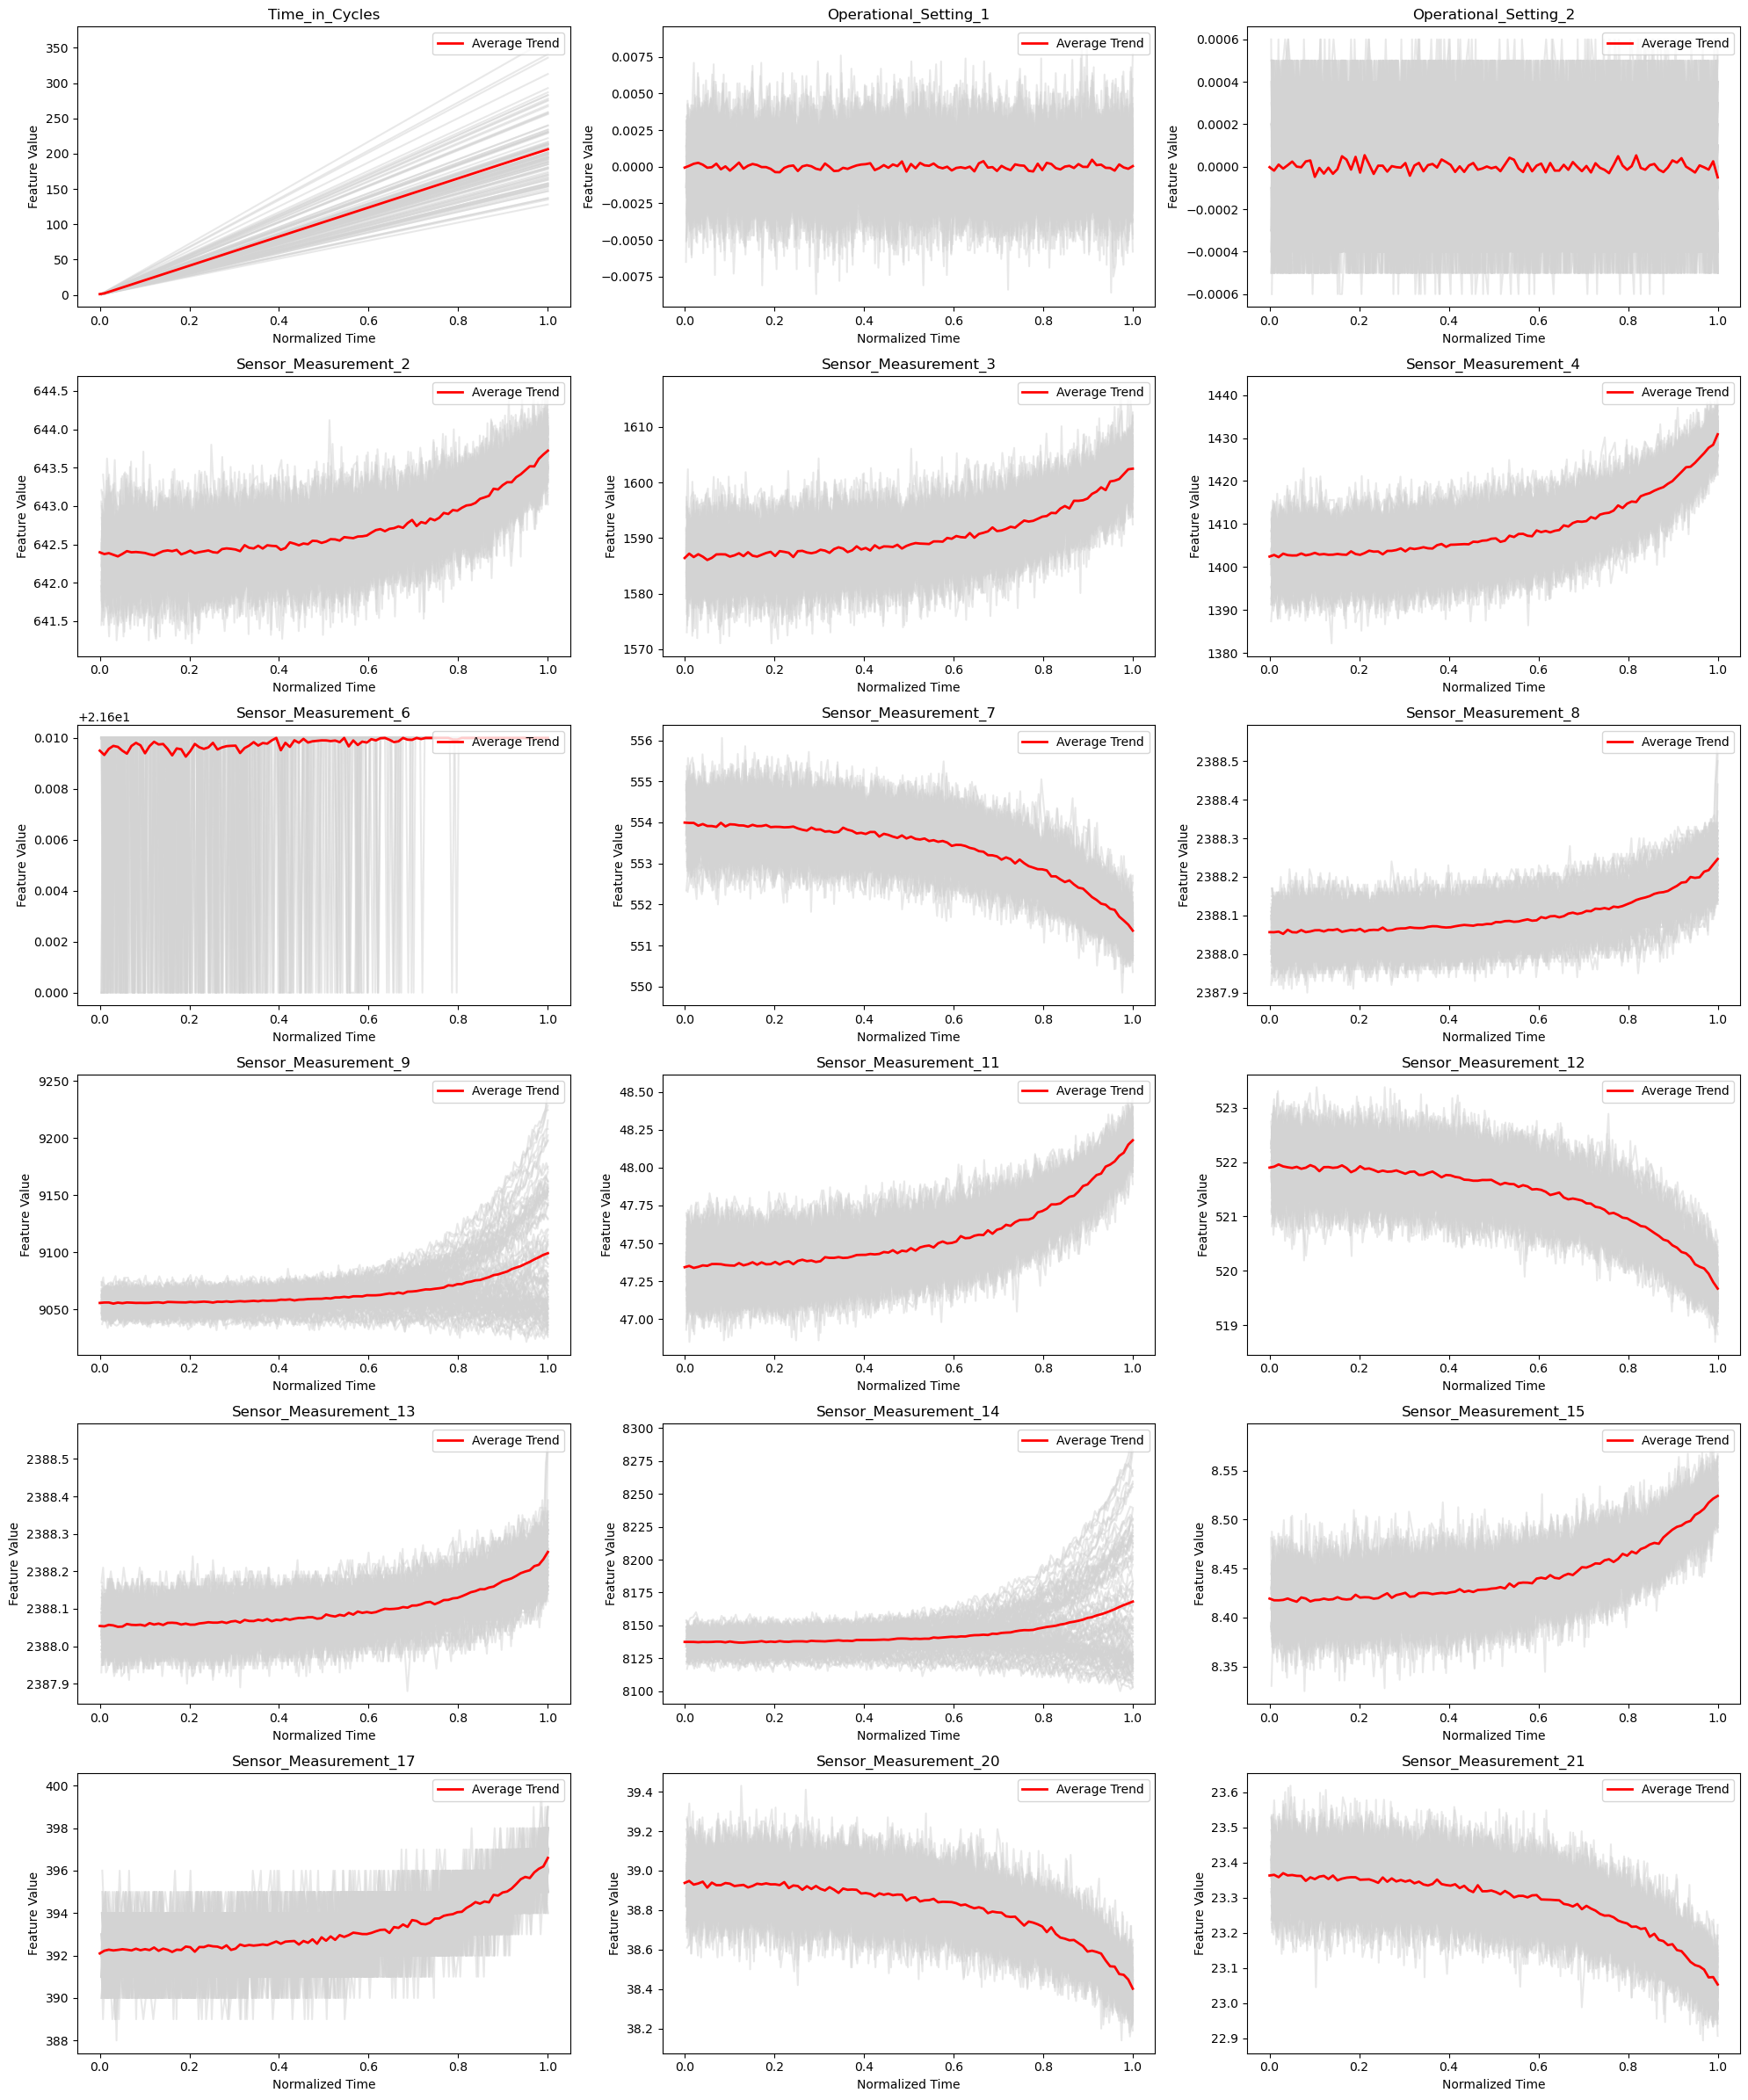

In [13]:
# Visualize multiple features as subplots
n_features = len(resampled_feature_names)
n_cols = 3  # Number of columns in the subplot grid
n_rows = int(np.ceil(n_features / n_cols))  # Determine the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, feature in enumerate(resampled_feature_names):
    ax = axes[i]
    
    # Plot individual unit trends
    for unit, unit_data in grouped:
        ax.plot(unit_data["normalized_time"], unit_data[feature], color='lightgray', alpha=0.5)
    
    # Plot average trend
    ax.plot(average_trends.index, average_trends[feature], color='red', label="Average Trend", linewidth=2)
    
    ax.set_title(feature)
    ax.set_xlabel("Normalized Time")
    ax.set_ylabel("Feature Value")
    ax.legend(loc='upper right')

# Turn off unused subplots
for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

I keep the time in cycle column to have a basic idea about how our resampling blurs each unit's max life.

We can see that excepts for operational settings and the sensor measurements 6, 9 and 14, the ones shows lowest correlation value in earlier pearsonr correlation evaluation, other sensor measurements each shows either a logarithmic decay or an exponential growth. And sensor measurement 9 and 14 shows similar mixuture of trends. 



At this point we already have a general idea about this dataset and our general design of the models.


We'll goes back to our original data and organized columns into groups: logarithmic decay, exponential growth, operational settings, "sensor measurement 9 and 14" and "sensor measurement 6". The last 4 would waits, and the first two will be stabilized by differencing and applied log function.

after removing the trends, we'll start building a naive global linear regression model for FD001. 

In [16]:
exponential_growth = ['Sensor_Measurement_2', 'Sensor_Measurement_3', 'Sensor_Measurement_4','Sensor_Measurement_8','Sensor_Measurement_11', 'Sensor_Measurement_12', 'Sensor_Measurement_13', 'Sensor_Measurement_15', 'Sensor_Measurement_17']
logarithmic_decay = ['Sensor_Measurement_7','Sensor_Measurement_20', 'Sensor_Measurement_21']

# Create a copy of the data to store stationary features
stationary_data = DF_train_FD001.copy()

# Process exponential growth features
for feature in exponential_growth:
    # Apply log transformation
    stationary_data[f"{feature}_stationary"] = np.log(DF_train_FD001[feature])

# Process logarithmic decay features
for feature in logarithmic_decay:
    # Apply differencing 
    stationary_data[f"{feature}_stationary"] = DF_train_FD001[feature].diff()

now we'll build a linear regression model and adjust the included features with its summary

In [17]:
import statsmodels.api as sm

stationary_data = stationary_data.fillna(0)

features_draft = [col for col in stationary_data.columns if col not in ['Max_Life', 'RUL', 'normalized_time','Unit_Number']]

X = stationary_data[features_draft]
y = stationary_data['RUL']


X_train_with_const = sm.add_constant(X)


linear_model = sm.OLS(y, X_train_with_const)
linear_model_fit = linear_model.fit()


print(linear_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1344.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:58:22   Log-Likelihood:            -1.0541e+05
No. Observations:               20631   AIC:                         2.109e+05
Df Residuals:                   20600   BIC:                         2.111e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Time_in_

In [18]:
features_draft = [col for col in stationary_data.columns if col not in ['Max_Life', 'RUL', 'normalized_time','Unit_Number']]

# Get the p-values from the fitted model
p_values = linear_model_fit.pvalues

# Filter for columns with p-value > 0.05
insignificant_features = p_values[p_values > 0.05].index.tolist()

features_draft = [col for col in features_draft if col not in insignificant_features]
print("Features with p-value > 0.05:", insignificant_features)
print("constant:",constant_columns)

t_stats = linear_model_fit.tvalues

# Sort the t-statistics by absolute value
sorted_features_by_tstat = t_stats.abs().sort_values(ascending=False)

# Print the sorted features
print("Columns sorted by absolute t-statistics:")
for feature, t_stat in sorted_features_by_tstat.items():
    if feature in features_draft:
        print(f"{feature}: {t_stat:.4f}")

Features with p-value > 0.05: ['Operational_Setting_1', 'Operational_Setting_3', 'Sensor_Measurement_1', 'Sensor_Measurement_5', 'Sensor_Measurement_6', 'Sensor_Measurement_10', 'Sensor_Measurement_12', 'Sensor_Measurement_16', 'Sensor_Measurement_18', 'Sensor_Measurement_19', 'Sensor_Measurement_12_stationary', 'Sensor_Measurement_20_stationary']
constant: ['Operational_Setting_3', 'Sensor_Measurement_1', 'Sensor_Measurement_5', 'Sensor_Measurement_10', 'Sensor_Measurement_16', 'Sensor_Measurement_18', 'Sensor_Measurement_19']
Columns sorted by absolute t-statistics:
Time_in_Cycles: 61.7067
Sensor_Measurement_13: 7.7510
Sensor_Measurement_13_stationary: 7.7510
Sensor_Measurement_17_stationary: 6.6690
Sensor_Measurement_17: 6.6569
Sensor_Measurement_7: 6.5976
Sensor_Measurement_8: 6.2115
Sensor_Measurement_8_stationary: 6.2114
Sensor_Measurement_21: 5.5978
Sensor_Measurement_4_stationary: 4.9812
Sensor_Measurement_4: 4.9384
Sensor_Measurement_3_stationary: 4.8991
Sensor_Measurement_3: 

In [19]:
filtered_t_stats = {key: value for key, value in t_stats.items() if key in features_draft}
t_stats_df = pd.DataFrame(list(filtered_t_stats.items()), columns=["Feature", "T_Value"])

# Identify sensor-stationary pairs
sensor_pairs = []
for feature in t_stats_df['Feature']:
    if "_stationary" in feature:
        original = feature.replace("_stationary", "")
        if original in t_stats_df['Feature'].values:
            sensor_pairs.append((original, feature))


kept_features = []

for original, stationary in sensor_pairs:
    t_original = t_stats_df.loc[t_stats_df['Feature'] == original, 'T_Value'].values[0]
    t_stationary = t_stats_df.loc[t_stats_df['Feature'] == stationary, 'T_Value'].values[0]
    if abs(t_stationary) > abs(t_original):
        if original in features_draft: 
            features_draft.remove(original)
    else:
        if stationary in features_draft: features_draft.remove(stationary)

print("features_draft", features_draft)

features_draft ['Time_in_Cycles', 'Operational_Setting_2', 'Sensor_Measurement_7', 'Sensor_Measurement_8', 'Sensor_Measurement_9', 'Sensor_Measurement_13', 'Sensor_Measurement_14', 'Sensor_Measurement_20', 'Sensor_Measurement_21', 'Sensor_Measurement_2_stationary', 'Sensor_Measurement_3_stationary', 'Sensor_Measurement_4_stationary', 'Sensor_Measurement_11_stationary', 'Sensor_Measurement_15_stationary', 'Sensor_Measurement_17_stationary']


In [20]:
X2 = stationary_data[features_draft]
X_train_with_const2 = sm.add_constant(X2)

linear_model2 = sm.OLS(y, X_train_with_const2)
linear_model_fit2 = linear_model2.fit()


print(linear_model_fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2607.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:58:25   Log-Likelihood:            -1.0562e+05
No. Observations:               20631   AIC:                         2.113e+05
Df Residuals:                   20615   BIC:                         2.114e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [21]:
features_draft.remove('Operational_Setting_2')

X3 = stationary_data[features_draft]
X_train_with_const3 = sm.add_constant(X3)

linear_model3 = sm.OLS(y, X_train_with_const3)
linear_model_fit3 = linear_model3.fit()


print(linear_model_fit3.summary())

                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2793.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:58:26   Log-Likelihood:            -1.0562e+05
No. Observations:               20631   AIC:                         2.113e+05
Df Residuals:                   20616   BIC:                         2.114e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [23]:
#naive model:linear_model_fit3
from joblib import dump, load

# Save the model and preprocessed data
dump((linear_model_fit3, X_train_with_const3.columns), "naive_model_and_columns.joblib")

['naive_model_and_columns.joblib']

In [43]:
stationary_data.to_csv("stationary_data.csv", index=False)  # Set index=False to exclude the index column


In [19]:
DF_train_FD002 = pd.read_csv("train_FD002.txt", delim_whitespace=True, names=column_names)
#feature resampled visualization 
data = DF_train_FD002

#resample each unit to get normalized time
data['normalized_time'] = data.groupby('Unit_Number')['Time_in_Cycles'].transform(lambda x: x / x.max())

# Define normalized time points for interpolation
normalized_time_points = np.linspace(0, 1, 100)  # 100 points from 0 to 1

# Interpolate each feature
grouped = data.groupby("Unit_Number")
interpolated_features = []
resampled_feature_names = [col for col in data.columns if (col not in ['RUL','Max_Life','Unit_Number','normalized_time'])   ]


for unit, unit_data in grouped:
    unit_data = unit_data.sort_values(by="normalized_time")  # Ensure proper sorting
    interpolated = pd.DataFrame({
        "normalized_time": normalized_time_points
    })
    for col in resampled_feature_names:  
        interpolated[col] = np.interp(
            normalized_time_points,
            unit_data["normalized_time"],
            unit_data[col]
        )
    interpolated_features.append(interpolated)

# Combine all units' interpolated data
interpolated_df = pd.concat(interpolated_features)

# Calculate average trend for each feature
average_trends = interpolated_df.groupby("normalized_time").mean()

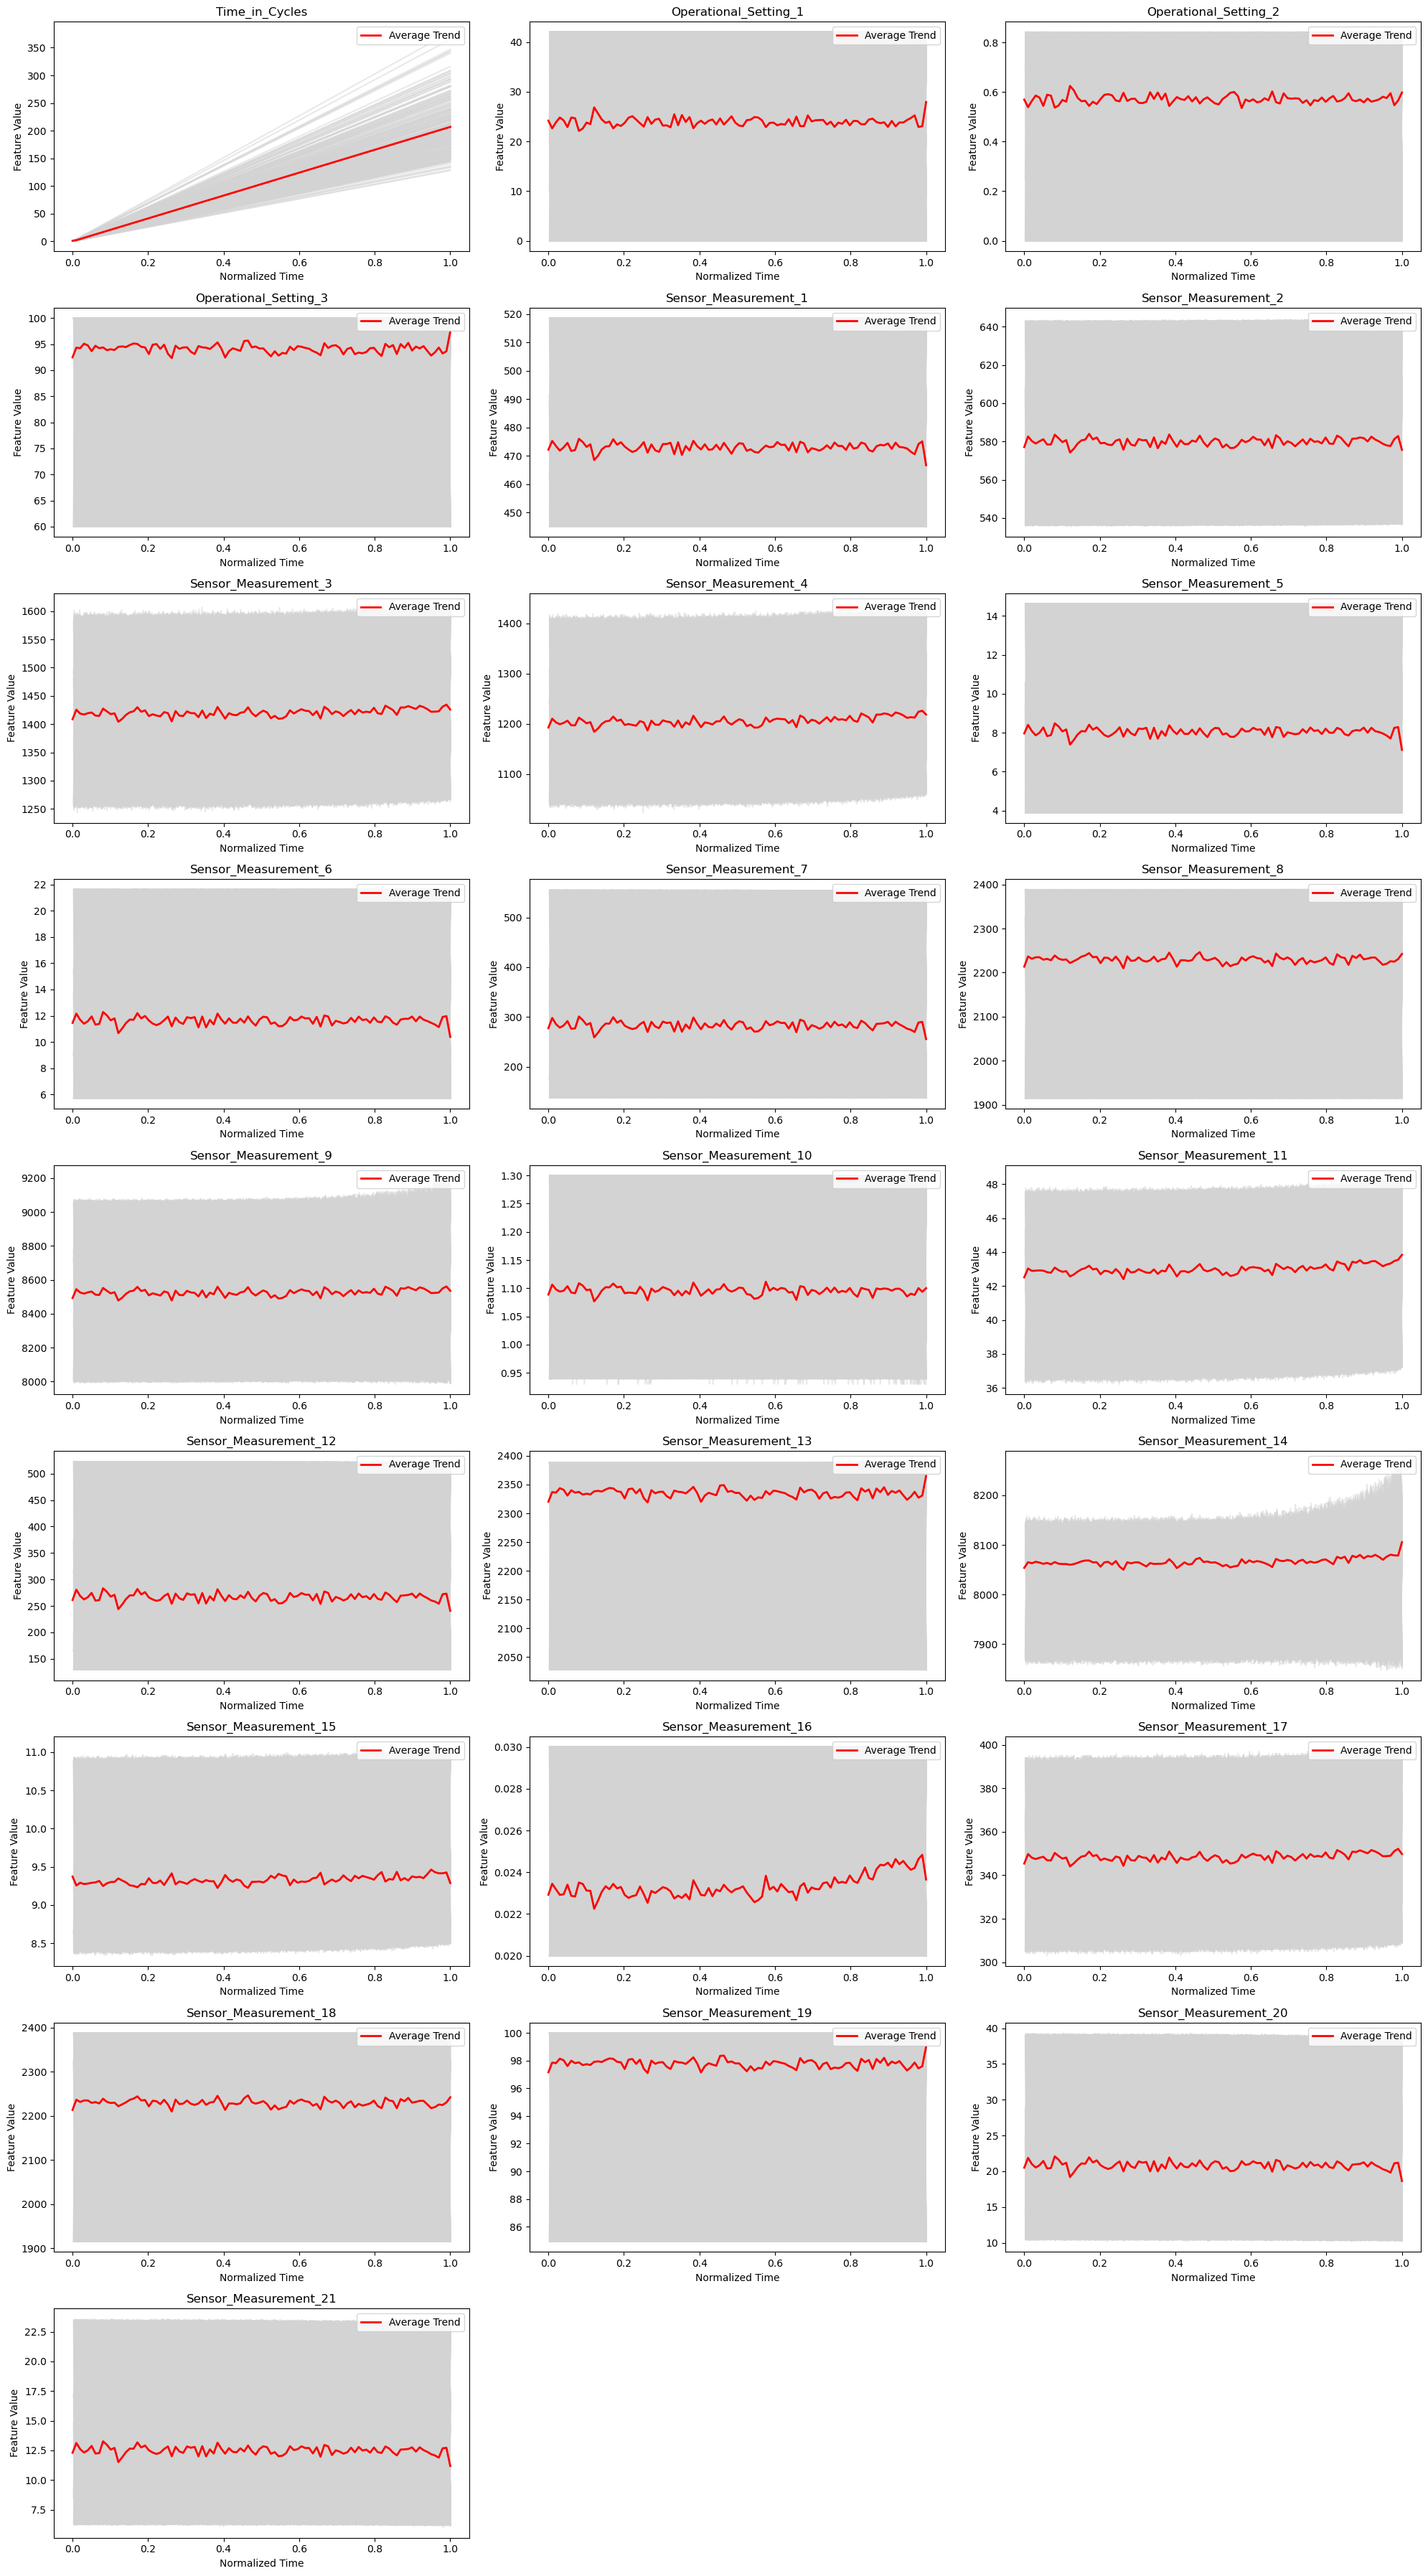

In [20]:
# Visualize multiple features as subplots
n_features = len(resampled_feature_names)
n_cols = 3  # Number of columns in the subplot grid
n_rows = int(np.ceil(n_features / n_cols))  # Determine the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, feature in enumerate(resampled_feature_names):
    ax = axes[i]
    
    # Plot individual unit trends
    for unit, unit_data in grouped:
        ax.plot(unit_data["normalized_time"], unit_data[feature], color='lightgray', alpha=0.5)
    
    # Plot average trend
    ax.plot(average_trends.index, average_trends[feature], color='red', label="Average Trend", linewidth=2)
    
    ax.set_title(feature)
    ax.set_xlabel("Normalized Time")
    ax.set_ylabel("Feature Value")
    ax.legend(loc='upper right')

# Turn off unused subplots
for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [21]:
DF_train_FD003 = pd.read_csv("train_FD003.txt", delim_whitespace=True, names=column_names)
#feature resampled visualization 
data = DF_train_FD003

#resample each unit to get normalized time
data['normalized_time'] = data.groupby('Unit_Number')['Time_in_Cycles'].transform(lambda x: x / x.max())

# Define normalized time points for interpolation
normalized_time_points = np.linspace(0, 1, 100)  # 100 points from 0 to 1

# Interpolate each feature
grouped = data.groupby("Unit_Number")
interpolated_features = []
resampled_feature_names = [col for col in data.columns if (col not in ['RUL','Max_Life','Unit_Number','normalized_time'])   ]


for unit, unit_data in grouped:
    unit_data = unit_data.sort_values(by="normalized_time")  # Ensure proper sorting
    interpolated = pd.DataFrame({
        "normalized_time": normalized_time_points
    })
    for col in resampled_feature_names:  
        interpolated[col] = np.interp(
            normalized_time_points,
            unit_data["normalized_time"],
            unit_data[col]
        )
    interpolated_features.append(interpolated)

# Combine all units' interpolated data
interpolated_df = pd.concat(interpolated_features)

# Calculate average trend for each feature
average_trends = interpolated_df.groupby("normalized_time").mean()

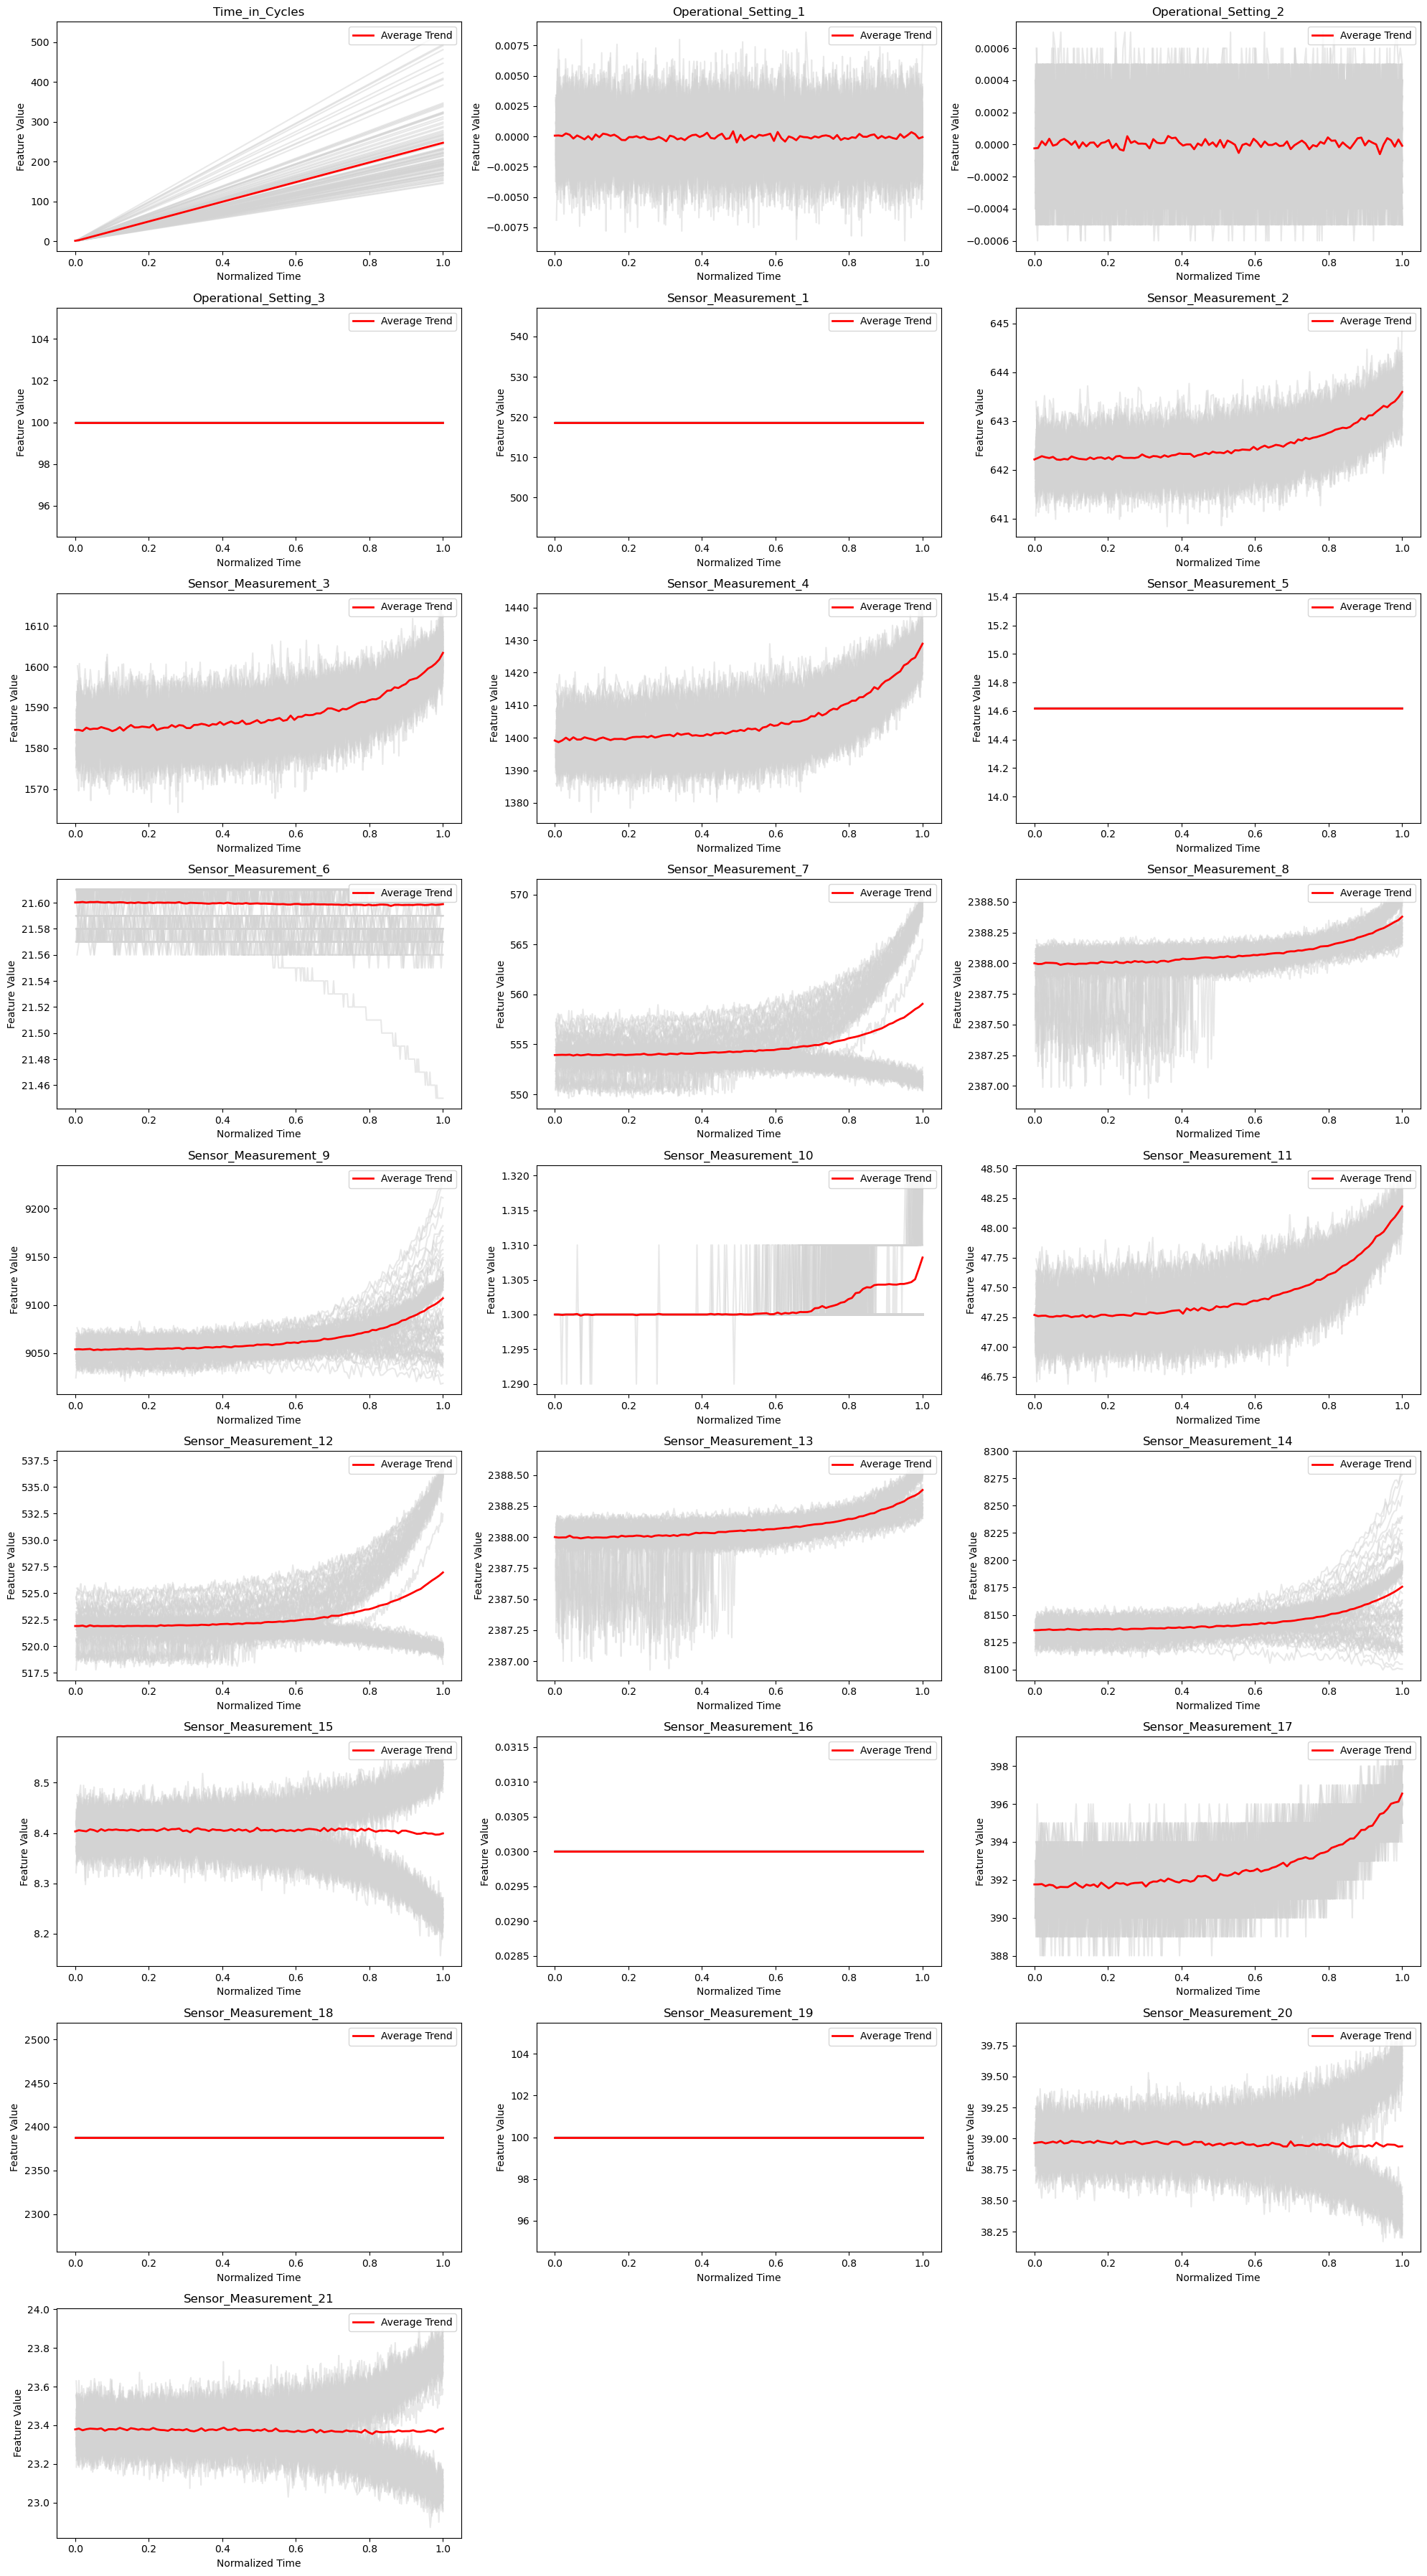

In [22]:
# Visualize multiple features as subplots
n_features = len(resampled_feature_names)
n_cols = 3  # Number of columns in the subplot grid
n_rows = int(np.ceil(n_features / n_cols))  # Determine the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, feature in enumerate(resampled_feature_names):
    ax = axes[i]
    
    # Plot individual unit trends
    for unit, unit_data in grouped:
        ax.plot(unit_data["normalized_time"], unit_data[feature], color='lightgray', alpha=0.5)
    
    # Plot average trend
    ax.plot(average_trends.index, average_trends[feature], color='red', label="Average Trend", linewidth=2)
    
    ax.set_title(feature)
    ax.set_xlabel("Normalized Time")
    ax.set_ylabel("Feature Value")
    ax.legend(loc='upper right')

# Turn off unused subplots
for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [23]:
DF_train_FD004 = pd.read_csv("train_FD004.txt", delim_whitespace=True, names=column_names)
#feature resampled visualization 
data = DF_train_FD004

#resample each unit to get normalized time
data['normalized_time'] = data.groupby('Unit_Number')['Time_in_Cycles'].transform(lambda x: x / x.max())

# Define normalized time points for interpolation
normalized_time_points = np.linspace(0, 1, 100)  # 100 points from 0 to 1

# Interpolate each feature
grouped = data.groupby("Unit_Number")
interpolated_features = []
resampled_feature_names = [col for col in data.columns if (col not in ['RUL','Max_Life','Unit_Number','normalized_time'])   ]


for unit, unit_data in grouped:
    unit_data = unit_data.sort_values(by="normalized_time")  # Ensure proper sorting
    interpolated = pd.DataFrame({
        "normalized_time": normalized_time_points
    })
    for col in resampled_feature_names:  
        interpolated[col] = np.interp(
            normalized_time_points,
            unit_data["normalized_time"],
            unit_data[col]
        )
    interpolated_features.append(interpolated)

# Combine all units' interpolated data
interpolated_df = pd.concat(interpolated_features)

# Calculate average trend for each feature
average_trends = interpolated_df.groupby("normalized_time").mean()

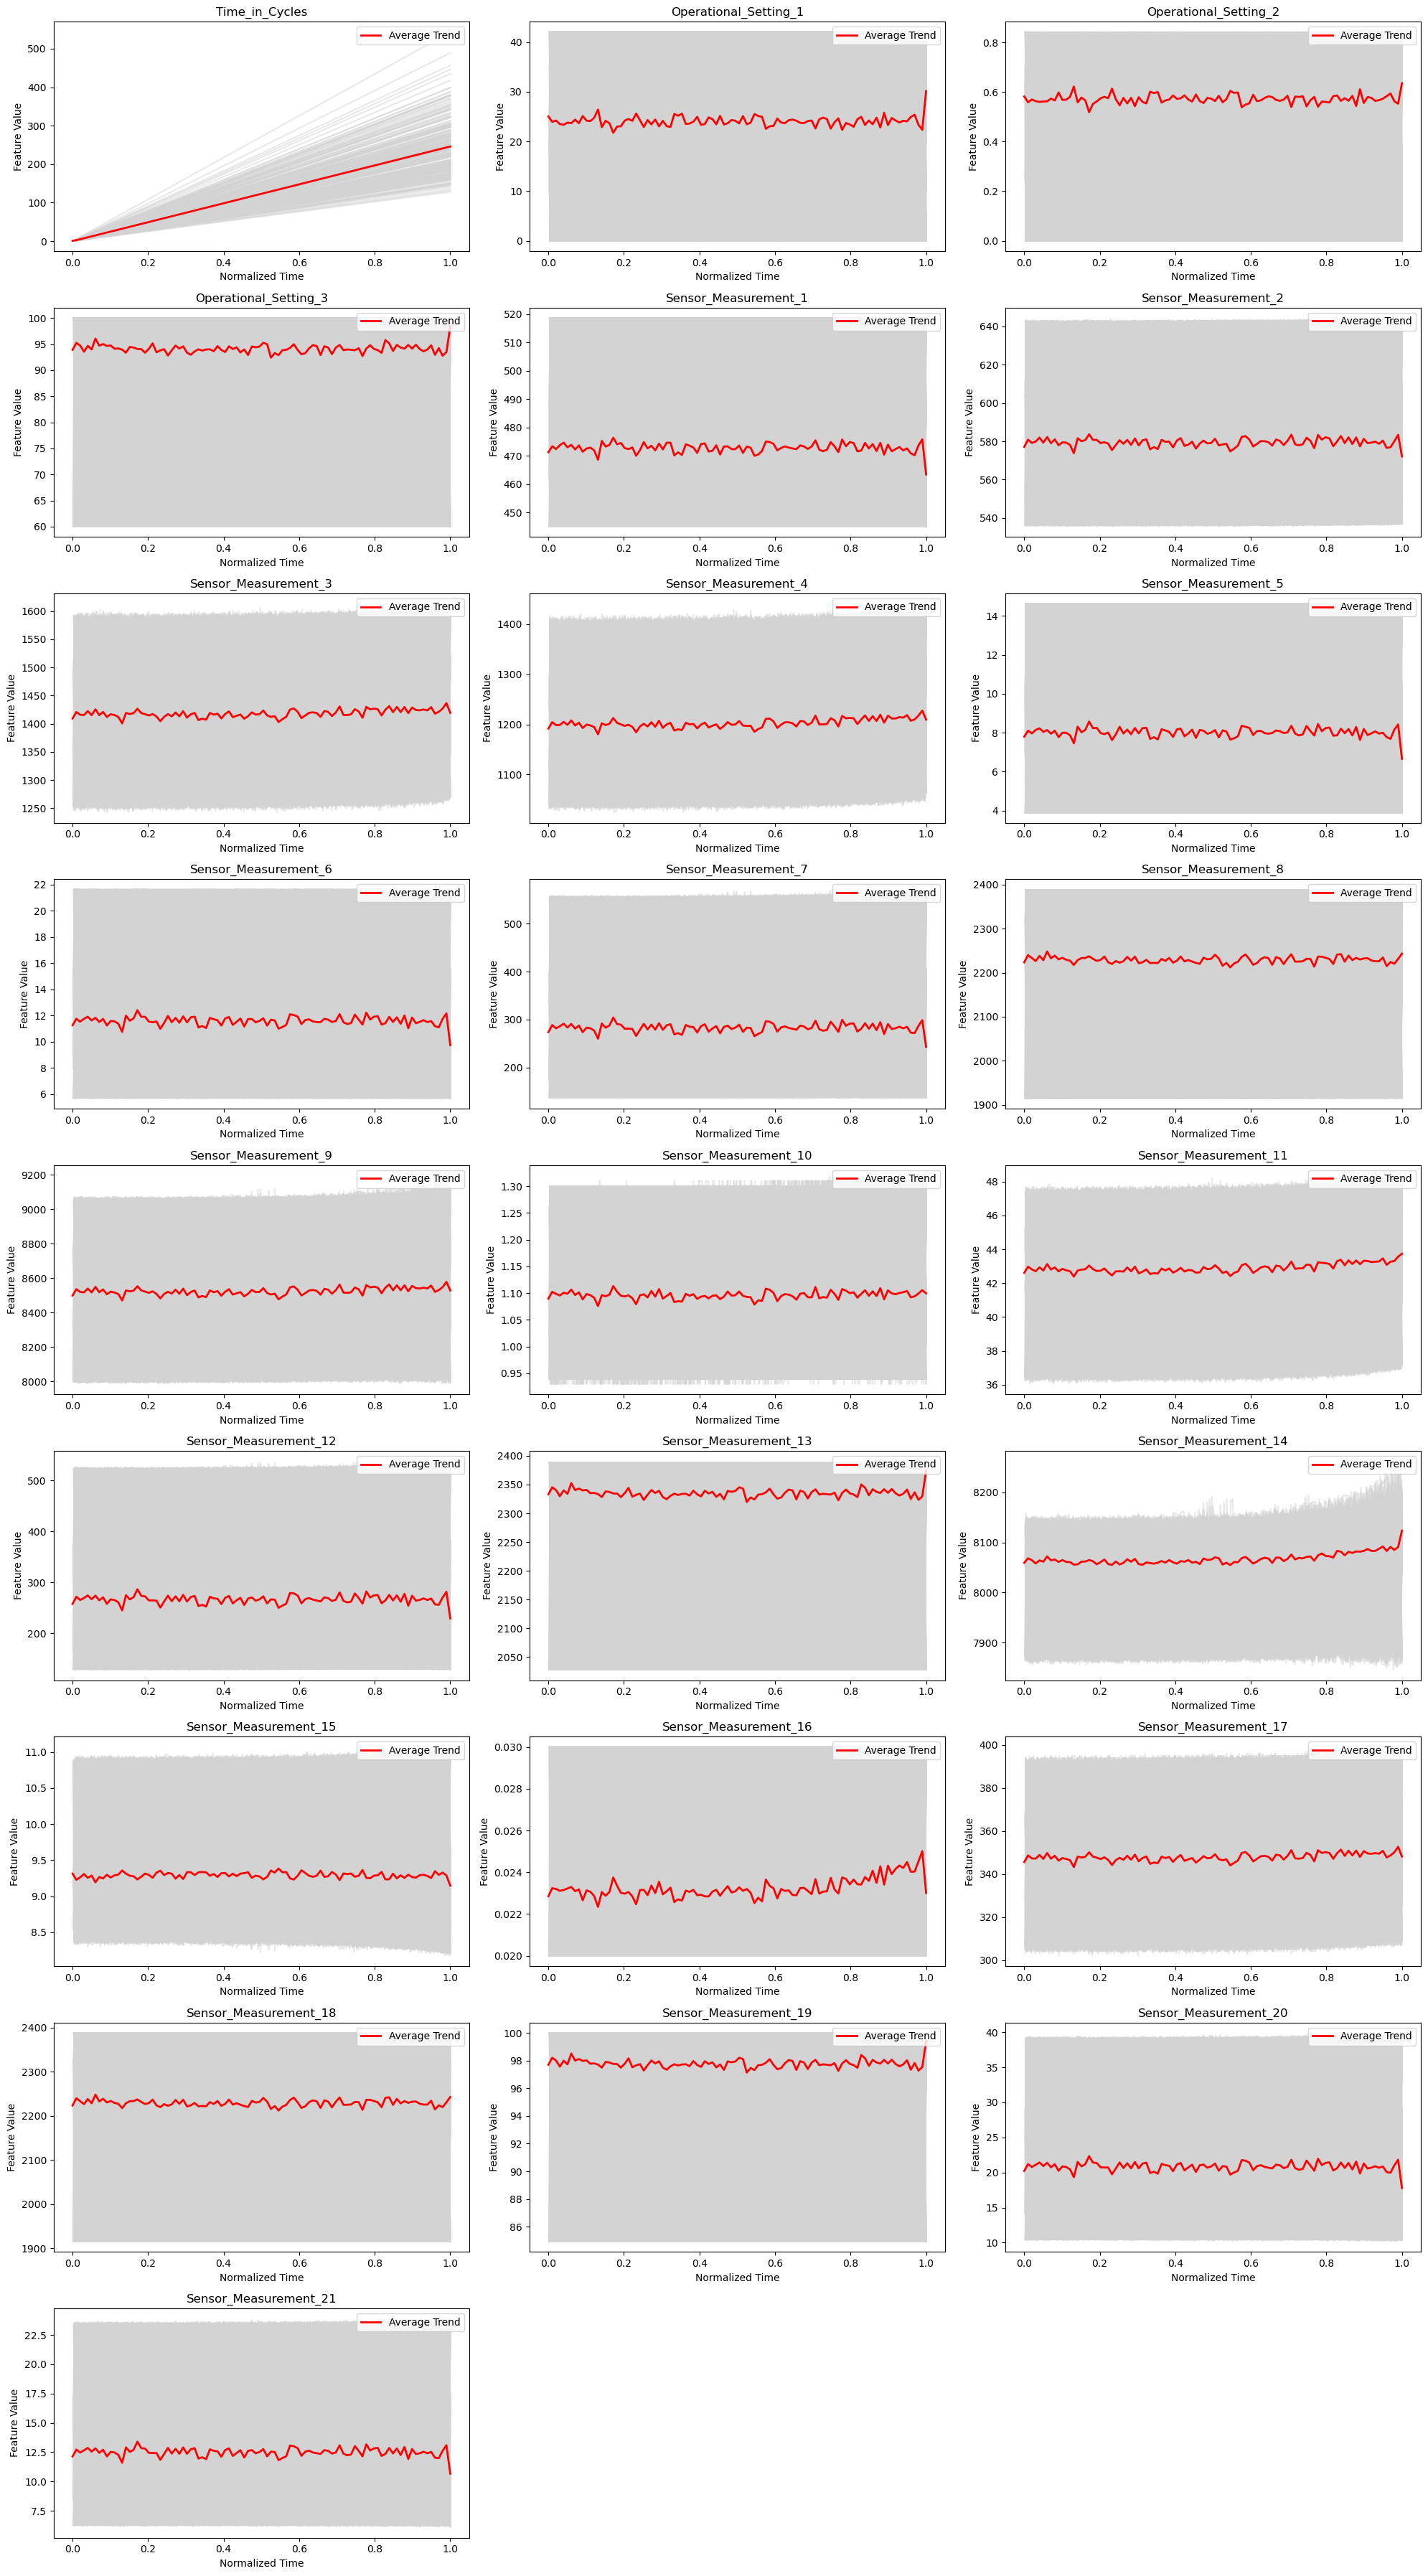

In [24]:
# Visualize multiple features as subplots
n_features = len(resampled_feature_names)
n_cols = 3  # Number of columns in the subplot grid
n_rows = int(np.ceil(n_features / n_cols))  # Determine the number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, feature in enumerate(resampled_feature_names):
    ax = axes[i]
    
    # Plot individual unit trends
    for unit, unit_data in grouped:
        ax.plot(unit_data["normalized_time"], unit_data[feature], color='lightgray', alpha=0.5)
    
    # Plot average trend
    ax.plot(average_trends.index, average_trends[feature], color='red', label="Average Trend", linewidth=2)
    
    ax.set_title(feature)
    ax.set_xlabel("Normalized Time")
    ax.set_ylabel("Feature Value")
    ax.legend(loc='upper right')

# Turn off unused subplots
for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# DRAFT FROM HERE, DON'T RUN, WILL DELETE LATER


now we'll try to cluster the operational settings in two ways, and set a simple global naive log model (since the damage is exponetional) as 

1) segment then cluster segment
2) calculate mean and variance with sliding window
3)* (this is optional due to the high calculational cost) cluster with DTW

In [24]:
import ruptures as rpt

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
#operational_settings = DF_train_FD001[['Unit_Number', 'Time_in_Cycles', 'Operational_Setting_1', 'Operational_Setting_2']]
segment_related_features = stationary_data[['Unit_Number', 'Time_in_Cycles', 'Operational_Setting_1', 'Operational_Setting_2','Sensor_Measurement_11_stationary']]

# Detect segments for each unit
segments = {}
for unit in segment_related_features['Unit_Number'].unique():
    unit_data = segment_related_features[segment_related_features['Unit_Number'] == unit]
    scaler = StandardScaler()
    scaled_op_settings = scaler.fit_transform(unit_data[['Operational_Setting_1', 'Operational_Setting_2','Sensor_Measurement_11_stationary']])
    
    # Change point detection using Ruptures (e.g., Pelt with L2 cost)
    model = rpt.Pelt(model="l2").fit(scaled_op_settings)
    change_points = model.predict(pen=10)  # Adjust 'pen' (penalty) as needed
    
    segments[unit] = {
        'data': scaled_op_settings,
        'change_points': change_points
    }


In [26]:
segments_per_feature = {
    'Operational_Setting_1': [],
    'Operational_Setting_2': [],
    'Sensor_Measurement_11_stationary': []
}

# Extract segments for clustering
for unit, segment_info in segments.items():
    data = segment_info['data']
    change_points = segment_info['change_points']
    
    # For each feature
    for i, feature in enumerate(['Operational_Setting_1', 'Operational_Setting_2', 'Sensor_Measurement_11_stationary']):
        # Extract segments between change points
        feature_segments = [data[start:end, i] for start, end in zip([0] + change_points[:-1], change_points)]
        segments_per_feature[feature].extend(feature_segments)

In [33]:
from collections import Counter
sizes = [len(segments_per_feature['Sensor_Measurement_11_stationary'][i]) for i in range(len(segments_per_feature['Sensor_Measurement_11_stationary']))]

print(len(Counter(sizes).keys()))

63


In [34]:
from scipy.interpolate import interp1d
import numpy as np

# Function to normalize segment lengths
def normalize_segment_length(segment, length=100):
    if len(segment) == 0:  # Handle empty segments
        return np.zeros(length)
    x = np.linspace(0, 1, len(segment))
    f = interp1d(x, segment, kind='linear', fill_value="extrapolate")
    x_new = np.linspace(0, 1, length)
    return f(x_new)

# Normalize segments for each feature
normalized_segments = {
    feature: [normalize_segment_length(seg, length=100) for seg in seg_list]
    for feature, seg_list in segments_per_feature.items()
}

In [38]:
print(normalized_segments['Operational_Setting_1'][0])

[-0.26224076  1.07221987 -2.10995549  0.45631497 -0.87814567 -2.10995549
  0.61029119 -1.64802681  0.50764037 -1.5967014   1.02089447  0.91824365
 -0.87814567  0.55896578 -0.82682026  0.40498956  0.19968792 -1.49405058
  1.73945019 -1.80200304 -0.51886781  0.19968792  1.84210101 -0.41621699
  1.27752151  0.0970371  -0.51886781 -1.13477272  0.71294201 -1.0321219
  0.81559283  0.35366415 -2.05863008  0.86691824  0.25101333 -0.10826453
 -0.10826453 -0.82682026 -1.44272517  0.0970371   1.7907756   0.35366415
 -1.28874894  0.04571169 -0.57019322  0.25101333  0.0970371   1.07221987
 -0.62151863 -1.54537599 -0.41621699  1.02089447  1.17487069 -0.00561372
  0.55896578  0.45631497 -1.5967014  -0.62151863 -0.21091535 -0.41621699
  0.30233874  0.30233874  0.86691824  0.96956906  0.0970371  -0.26224076
  0.91824365 -0.82682026 -1.0321219  -0.15958994  0.91824365 -0.77549485
 -0.51886781  1.48282315  0.55896578 -0.67284404  1.2261961   2.15005347
  1.2261961  -0.00561372 -0.82682026 -0.51886781  0.

In [42]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

# Cluster each feature's segments
cluster_labels = {}
cluster_models = {}


for feature, segments in normalized_segments.items():
    # Convert to time-series dataset
    ts_data = to_time_series_dataset(segments)
    
    # Perform DTW clustering
    k = 3  # Number of clusters (adjust as needed)
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw", random_state=42)
    labels = model.fit_predict(ts_data)
    
    # Store results
    cluster_labels[feature] = labels
    cluster_models[feature] = model

SystemError: initialization of _internal failed without raising an exception

In [ ]:
for feature, model in cluster_models.items():
    plt.figure(figsize=(10, 6))
    for i, centroid in enumerate(model.cluster_centers_):
        plt.plot(centroid.ravel(), label=f"Cluster {i}")
    plt.title(f"Cluster Centroids for {feature}")
    plt.legend()
    plt.show()

In [ ]:
from tslearn.metrics import dtw

# Example: Map a test segment to a cluster
def map_segment_to_cluster(segment, model):
    segment_normalized = normalize_segment_length(segment, length=100)
    distances = [dtw(segment_normalized, centroid.ravel()) for centroid in model.cluster_centers_]
    return np.argmin(distances)

# For each feature in test data
test_segments = {
    'Operational_Setting_1': [...],  # Replace with actual test data
    'Operational_Setting_2': [...],
    'Sensor_Measurement_11_stationary': [...]
}

test_cluster_assignments = {}
for feature, segments in test_segments.items():
    model = cluster_models[feature]
    test_cluster_assignments[feature] = [map_segment_to_cluster(seg, model) for seg in segments]

In [20]:
segment_features = []

for unit, info in segments.items():
    data = info['data']
    change_points = info['change_points']
    
    # Create segments
    start = 0
    for end in change_points:
        segment = data[start:end, :]
        
        # Compute segment features (mean, variance, etc.)
        segment_mean = np.mean(segment, axis=0)
        segment_var = np.var(segment, axis=0)
        
        # Add features for clustering
        segment_features.append(np.concatenate([[unit], segment_mean, segment_var]))
        start = end

# Convert to DataFrame
segment_features_df = pd.DataFrame(segment_features, columns=['unit'] + 
                                   [f"op_mean_{i}" for i in range(1,3)] + 
                                   [f"op_var_{i}" for i in range(1,3)])

In [21]:
# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segment_features_df.iloc[:, 1:])

# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters
segment_features_df['cluster'] = kmeans.fit_predict(scaled_features)

In [26]:

segment_size = []

for unit, info in segments.items():
    data = info['data']
    change_points = info['change_points']
    
    # Create segments
    start = 0
    for end in change_points:
        size = end - start
        segment_size.append(size)
        start = end

        
print(Counter(segment_size).keys())
print(len(Counter(segment_size).keys()))


dict_keys([192, 287, 179, 189, 269, 188, 259, 20, 130, 201, 75, 147, 240, 170, 163, 180, 15, 209, 276, 195, 158, 234, 202, 168, 230, 199, 156, 35, 194, 191, 5, 181, 128, 216, 196, 207, 256, 214, 231, 215, 198, 213, 257, 193, 275, 137, 140, 91, 172, 185, 174, 283, 153, 313, 362, 208, 166, 229, 210, 154, 226, 293, 267, 278, 178, 145, 33, 217, 135, 341, 155, 258, 336, 200])
74


In [ ]:
operational_settings = data.iloc[:, 2:5]

# Generate rolling statistics
rolling_window = 20  # Adjust based on your need
rolling_features = operational_settings.rolling(window=rolling_window).mean().dropna()

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rolling_features)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust 'n_clusters' as needed
kmeans_labels = kmeans.fit_predict(scaled_features)

In [13]:

test1 = pd.read_csv("test_FD001.txt", delim_whitespace=True, names=column_names)
test2 = pd.read_csv("test_FD002.txt", delim_whitespace=True, names=column_names)
test3 = pd.read_csv("test_FD003.txt", delim_whitespace=True, names=column_names)
test4 = pd.read_csv("test_FD004.txt", delim_whitespace=True, names=column_names)

Max_Life_test_FD001 = test1.groupby('Unit_Number')['Time_in_Cycles'].max()
Max_Life_test_FD002 = test2.groupby('Unit_Number')['Time_in_Cycles'].max()
Max_Life_test_FD003 = test3.groupby('Unit_Number')['Time_in_Cycles'].max()
Max_Life_test_FD004 = test4.groupby('Unit_Number')['Time_in_Cycles'].max()

print(Max_Life_test_FD001.min())
print(Max_Life_test_FD002.min())
print(Max_Life_test_FD003.min())
print(Max_Life_test_FD004.min())

31
21
38
19


In [8]:
testa.head()

Unit_Number  Time_in_Cycles  Operational_Setting_1  \
0                1               1                 0.0023   
1                1               2                -0.0027   
2                1               3                 0.0003   
3                1               4                 0.0042   
4                1               5                 0.0014   
...            ...             ...                    ...   
12898          100               1                 0.0014   
12899          100               2                 0.0031   
12900          100               3                -0.0000   
12901          100               4                 0.0011   
12902          100               5                -0.0011   

       Operational_Setting_2  Operational_Setting_3  Sensor_Measurement_1  \
0                     0.0003                  100.0                518.67   
1                    -0.0003                  100.0                518.67   
2                     0.0001                  100.0                518.67   
3                     0.0000                  100.0                518.67   
4                     0.0000                  100.0                518.67   
...                      ...                    ...                   ...   
12898                 0.0003                  100.0                518.67   
12899                 0.0001                  100.0                518.67   
12900                 0.0001                  100.0                518.67   
12901                 0.0001                  100.0                518.67   
12902                 0.0005                  100.0                518.67   

       Sensor_Measurement_2  Sensor_Measurement_3  Sensor_Measurement_4  \
0                    643.02               1585.29               1398.21   
1                    641.71               1588.45               1395.42   
2                    642.46               1586.94               1401.34   
3                    642.44               1584.12               1406.42   
4                    642.51               1587.19               1401.92   
...                     ...                   ...                   ...   
12898                641.65               1591.50               1401.63   
12899                642.20               1588.99               1402.05   
12900                642.27               1587.47               1396.74   
12901                642.07               1579.17               1401.93   
12902                642.01               1589.70               1397.19   

       Sensor_Measurement_5  ...  Sensor_Measurement_12  \
0                     14.62  ...                 521.72   
1                     14.62  ...                 522.16   
2                     14.62  ...                 521.97   
3                     14.62  ...                 521.38   
4                     14.62  ...                 522.15   
...                     ...  ...                    ...   
12898                 14.62  ...                 522.06   
12899                 14.62  ...                 522.14   
12900                 14.62  ...                 522.54   
12901                 14.62  ...                 522.34   
12902                 14.62  ...                 522.49   

       Sensor_Measurement_13  Sensor_Measurement_14  Sensor_Measurement_15  \
0                    2388.03                8125.55                 8.4052   
1                    2388.06                8139.62                 8.3803   
2                    2388.03                8130.10                 8.4441   
3                    2388.05                8132.90                 8.3917   
4                    2388.03                8129.54                 8.4031   
...                      ...                    ...                    ...   
12898                2388.02                8138.54                 8.4067   
12899                2388.07                8137.35                 8.4291   
12900                2388.03         

In [10]:
RUL = pd.read_csv("RUL_FD001.txt", delim_whitespace=True, names=['RUL'])
RUL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


Let's proceed with train_FD002.


In [26]:
# Correlation of train_FD002

correlation_results_FD002 = {}

# Iterate over all columns except RUL
for col in DF_train_FD002.columns:
    if col != 'RUL':

        corr, p_val = pearsonr(DF_train_FD002[col], DF_train_FD002['RUL'])

        correlation_results_FD002[col] = {'correlation': corr, 'p_value': p_val}

# Convert the results to a DataFrame
correlation_train_FD002 = pd.DataFrame.from_dict(correlation_results_FD002, orient='index')
correlation_train_FD002 = correlation_df.sort_values(by='correlation', ascending=False)

correlation_train_FD002

correlation       p_value
Sensor_Measurement_12     0.671983  0.000000e+00
Sensor_Measurement_7      0.657223  0.000000e+00
Sensor_Measurement_21     0.635662  0.000000e+00
Sensor_Measurement_20     0.629428  0.000000e+00
Max_Life                  0.363152  0.000000e+00
Unit_Number               0.078753  9.478455e-30
Operational_Setting 2    -0.001948  7.796840e-01
Operational_Setting 1    -0.003198  6.459587e-01
Sensor_Measurement_6     -0.128348  1.689411e-76
Sensor_Measurement_14    -0.306769  0.000000e+00
Sensor_Measurement_9     -0.390102  0.000000e+00
Sensor_Measurement_13    -0.562569  0.000000e+00
Sensor_Measurement_8     -0.563968  0.000000e+00
Sensor_Measurement_3     -0.584520  0.000000e+00
Sensor_Measurement_17    -0.606154  0.000000e+00
Sensor_Measurement_2     -0.606484  0.000000e+00
Sensor_Measurement_15    -0.642667  0.000000e+00
Sensor_Measurement_4     -0.678948  0.000000e+00
Sensor_Measurement_11    -0.696228  0.000000e+00
Time_in_Cycles           -0.736241  0.000000e+00
Operational_Setting 3          NaN           NaN
Sensor_Measurement_1           NaN           NaN
Sensor_Measurement_5           NaN           NaN
Sensor_Measurement_10          NaN           NaN
Sensor_Measurement_16          NaN           NaN
Sensor_Measurement_18          NaN           NaN
Sensor_Measurement_19          NaN           NaN

In train_FD002, the ouput is similar to train_FD001. The top 5 most correlated columns are Time_in_Cycles, Sensor_Measurement_11, Sensor_Measurement_4, Sensor_Measurement_12, Sensor_Measurement_7 where Time_in_Cycles, Sensor_Measurement_11 and Sensor_Measurement_4 are negative correlation, Sensor_Measurement_12 and Sensor_Measurement_7 are positive correlation. Operational_Setting 1 and Operational_Setting 2 does not have any correlation. Those NaN clolumns are constant.

let's proceed with train_FD003.

In [27]:
# Correlation of train_FD003

correlation_results_FD003 = {}

# Iterate over all columns except RUL
for col in DF_train_FD003.columns:
    if col != 'RUL':

        corr, p_val = pearsonr(DF_train_FD003[col], DF_train_FD003['RUL'])

        correlation_results_FD003[col] = {'correlation': corr, 'p_value': p_val}

# Convert the results to a DataFrame
correlation_train_FD003 = pd.DataFrame.from_dict(correlation_results_FD003, orient='index')
correlation_train_FD003 = correlation_df.sort_values(by='correlation', ascending=False)

correlation_train_FD003

C:\Users\18065\AppData\Local\Temp/ipykernel_11516/262446804.py:9: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



correlation       p_value
Sensor_Measurement_12     0.671983  0.000000e+00
Sensor_Measurement_7      0.657223  0.000000e+00
Sensor_Measurement_21     0.635662  0.000000e+00
Sensor_Measurement_20     0.629428  0.000000e+00
Max_Life                  0.363152  0.000000e+00
Unit_Number               0.078753  9.478455e-30
Operational_Setting 2    -0.001948  7.796840e-01
Operational_Setting 1    -0.003198  6.459587e-01
Sensor_Measurement_6     -0.128348  1.689411e-76
Sensor_Measurement_14    -0.306769  0.000000e+00
Sensor_Measurement_9     -0.390102  0.000000e+00
Sensor_Measurement_13    -0.562569  0.000000e+00
Sensor_Measurement_8     -0.563968  0.000000e+00
Sensor_Measurement_3     -0.584520  0.000000e+00
Sensor_Measurement_17    -0.606154  0.000000e+00
Sensor_Measurement_2     -0.606484  0.000000e+00
Sensor_Measurement_15    -0.642667  0.000000e+00
Sensor_Measurement_4     -0.678948  0.000000e+00
Sensor_Measurement_11    -0.696228  0.000000e+00
Time_in_Cycles           -0.736241  0.000000e+00
Operational_Setting 3          NaN           NaN
Sensor_Measurement_1           NaN           NaN
Sensor_Measurement_5           NaN           NaN
Sensor_Measurement_10          NaN           NaN
Sensor_Measurement_16          NaN           NaN
Sensor_Measurement_18          NaN           NaN
Sensor_Measurement_19          NaN           NaN

In [31]:
# Correlation of train_FD004

correlation_results_FD004 = {}

# Iterate over all columns except RUL
for col in DF_train_FD004.columns:
    if col != 'RUL':

        corr, p_val = pearsonr(DF_train_FD004[col], DF_train_FD004['RUL'])

        correlation_results_FD004[col] = {'correlation': corr, 'p_value': p_val}

# Convert the results to a DataFrame
correlation_train_FD004 = pd.DataFrame.from_dict(correlation_results_FD004, orient='index')
correlation_train_FD004 = correlation_df.sort_values(by='correlation', ascending=False)

correlation_train_FD004

correlation       p_value
Sensor_Measurement_12     0.671983  0.000000e+00
Sensor_Measurement_7      0.657223  0.000000e+00
Sensor_Measurement_21     0.635662  0.000000e+00
Sensor_Measurement_20     0.629428  0.000000e+00
Max_Life                  0.363152  0.000000e+00
Unit_Number               0.078753  9.478455e-30
Operational_Setting 2    -0.001948  7.796840e-01
Operational_Setting 1    -0.003198  6.459587e-01
Sensor_Measurement_6     -0.128348  1.689411e-76
Sensor_Measurement_14    -0.306769  0.000000e+00
Sensor_Measurement_9     -0.390102  0.000000e+00
Sensor_Measurement_13    -0.562569  0.000000e+00
Sensor_Measurement_8     -0.563968  0.000000e+00
Sensor_Measurement_3     -0.584520  0.000000e+00
Sensor_Measurement_17    -0.606154  0.000000e+00
Sensor_Measurement_2     -0.606484  0.000000e+00
Sensor_Measurement_15    -0.642667  0.000000e+00
Sensor_Measurement_4     -0.678948  0.000000e+00
Sensor_Measurement_11    -0.696228  0.000000e+00
Time_in_Cycles           -0.736241  0.000000e+00
Operational_Setting 3          NaN           NaN
Sensor_Measurement_1           NaN           NaN
Sensor_Measurement_5           NaN           NaN
Sensor_Measurement_10          NaN           NaN
Sensor_Measurement_16          NaN           NaN
Sensor_Measurement_18          NaN           NaN
Sensor_Measurement_19          NaN           NaN

As we can see from all correlation outputs of train_FD003 and train_FD004, the result are pretty much the same among all 4 data.

In [ ]:
# RUL_FD001, RUL_FD002, RUL_FD003, RUL_FD004

DF_RUL_FD001 = pd.read_csv("RUL_FD001.txt", delim_whitespace=True, names = column_name_RUL)
DF_RUL_FD002 = pd.read_csv("RUL_FD002.txt", delim_whitespace=True, names = column_name_RUL)
DF_RUL_FD003 = pd.read_csv("RUL_FD003.txt", delim_whitespace=True, names = column_name_RUL)
DF_RUL_FD004 = pd.read_csv("RUL_FD004.txt", delim_whitespace=True, names = column_name_RUL)

missing_RUL_FD001= DF_train_FD001.isna().sum()
missing_RUL_FD002= DF_train_FD002.isna().sum()
missing_RUL_FD003= DF_train_FD003.isna().sum()
missing_RUL_FD004= DF_train_FD004.isna().sum()

# RUL data set
missing_columns_RUL_FD001 = missing_RUL_FD001[missing_RUL_FD001 > 0]
missing_columns_RUL_FD002 = missing_RUL_FD001[missing_RUL_FD002 > 0]
missing_columns_RUL_FD003 = missing_RUL_FD001[missing_RUL_FD003 > 0]
missing_columns_RUL_FD004 = missing_RUL_FD001[missing_RUL_FD004 > 0]

print(missing_columns_RUL_FD001)
print(missing_columns_RUL_FD002)
print(missing_columns_RUL_FD003)
print(missing_columns_RUL_FD004)